# Recurrent Neural Network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Preprocessing

In [2]:
dataset_train =  pd.read_csv("dataset_dl/ETH-USD-Train.csv")
display(dataset_train)

,Date,Open,High,Low,Close,Adj Close,Volume
0,25-11-2021,4271.394531,4550.518066,4249.774414,4274.743164,4274.743164,18705358318
1,26-11-2021,4522.208984,4550.842285,3933.506592,4030.908936,4030.908936,26281795488
2,27-11-2021,4042.999023,4187.684082,4033.513916,4096.912109,4096.912109,16515693874
3,28-11-2021,4101.648926,4297.916504,3989.969971,4294.453613,4294.453613,15953126340
4,29-11-2021,4296.946777,4460.848633,4284.504883,4445.104980,4445.104980,19086475837
...,...,...,...,...,...,...,...
268,20-08-2022,1612.650635,1652.218750,1534.298828,1577.003784,1577.003784,18334580263
269,21-08-2022,1576.543579,1640.936523,1569.046509,1619.318970,1619.318970,15849221752
270,22-08-2022,1619.166870,1622.778809,1535.014771,1622.505859,1622.505859,18557078599
271,23-08-2022,1622.939331,1666.676514,1569.428589,1662.769897,1662.769897,18322041914


In [3]:
# Dropping NaN rows
dataset_train = dataset_train.dropna()

In [4]:
display(dataset_train)

,Date,Open,High,Low,Close,Adj Close,Volume
0,25-11-2021,4271.394531,4550.518066,4249.774414,4274.743164,4274.743164,18705358318
1,26-11-2021,4522.208984,4550.842285,3933.506592,4030.908936,4030.908936,26281795488
2,27-11-2021,4042.999023,4187.684082,4033.513916,4096.912109,4096.912109,16515693874
3,28-11-2021,4101.648926,4297.916504,3989.969971,4294.453613,4294.453613,15953126340
4,29-11-2021,4296.946777,4460.848633,4284.504883,4445.104980,4445.104980,19086475837
...,...,...,...,...,...,...,...
268,20-08-2022,1612.650635,1652.218750,1534.298828,1577.003784,1577.003784,18334580263
269,21-08-2022,1576.543579,1640.936523,1569.046509,1619.318970,1619.318970,15849221752
270,22-08-2022,1619.166870,1622.778809,1535.014771,1622.505859,1622.505859,18557078599
271,23-08-2022,1622.939331,1666.676514,1569.428589,1662.769897,1662.769897,18322041914


In [5]:
# Opening price of ETH (in USD)
training_set = dataset_train.iloc[:,1:2].values

In [6]:
print(training_set)

[[4271.394531]
 [4522.208984]
 [4042.999023]
 [4101.648926]
 [4296.946777]
 [4447.768066]
 [4623.679688]
 [4586.333008]
 [4514.355957]
 [4227.762207]
 [4119.628906]
 [4199.      ]
 [4358.586914]
 [4311.674316]
 [4433.024902]
 [4113.588379]
 [3909.667725]
 [4084.811279]
 [4136.359863]
 [3782.822754]
 [3862.251465]
 [4020.415039]
 [3959.012451]
 [3880.291504]
 [3960.872314]
 [3923.695801]
 [3938.463867]
 [4018.695801]
 [3981.96167 ]
 [4111.345215]
 [4049.781982]
 [4094.151611]
 [4064.746338]
 [4037.538086]
 [3797.436279]
 [3632.219727]
 [3713.430176]
 [3683.047119]
 [3769.29834 ]
 [3829.535645]
 [3761.361572]
 [3794.269043]
 [3549.708984]
 [3417.837891]
 [3193.502441]
 [3091.696289]
 [3157.570557]
 [3082.990967]
 [3238.449951]
 [3372.10498 ]
 [3248.648682]
 [3309.844238]
 [3330.387207]
 [3350.947266]
 [3212.287598]
 [3163.850342]
 [3095.271729]
 [3002.956787]
 [2561.145264]
 [2406.924316]
 [2535.891113]
 [2440.393555]
 [2455.579102]
 [2467.188477]
 [2421.646973]
 [2546.590576]
 [2598.564

In [7]:
# Feature Scalling by doing Normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [8]:
print(training_set_scaled)
print(f"\nNo of Elemets: {len(training_set_scaled)}")

[[0.90295921]
 [0.97204879]
 [0.84004517]
 [0.85620093]
 [0.90999785]
 [0.95154322]
 [1.        ]
 [0.98971245]
 [0.96988558]
 [0.89094021]
 [0.86115371]
 [0.88301734]
 [0.9269773 ]
 [0.91405471]
 [0.94748206]
 [0.85948978]
 [0.80331761]
 [0.85156281]
 [0.86576243]
 [0.76837678]
 [0.79025628]
 [0.83382417]
 [0.81691015]
 [0.79522561]
 [0.81742247]
 [0.8071818 ]
 [0.81124982]
 [0.83335058]
 [0.82323177]
 [0.85887188]
 [0.84191361]
 [0.85413571]
 [0.84603571]
 [0.8385409 ]
 [0.77240223]
 [0.72689153]
 [0.74926183]
 [0.74089249]
 [0.76465133]
 [0.78124435]
 [0.76246506]
 [0.77152978]
 [0.70416304]
 [0.66783771]
 [0.60604206]
 [0.57799845]
 [0.59614423]
 [0.57560047]
 [0.61842335]
 [0.65524008]
 [0.6212327 ]
 [0.63808968]
 [0.64374847]
 [0.64941196]
 [0.61121664]
 [0.59787407]
 [0.57898334]
 [0.55355418]
 [0.43185237]
 [0.38937053]
 [0.42489584]
 [0.39859   ]
 [0.40277302]
 [0.40597095]
 [0.39342605]
 [0.42784313]
 [0.44216003]
 [0.44345428]
 [0.46676805]
 [0.49543253]
 [0.46520541]
 [0.46

In [9]:
print("Statistical Summary of Feature Scaled Data:")
pd.DataFrame(training_set_scaled).describe()

Statistical Summary of Feature Scaled Data:


,0
count,273.000000
mean,0.437313
std,0.258616
min,0.000000
25%,0.219347
50%,0.464884
75%,0.600173
max,1.000000


In [10]:
# Creating a Data Structure with 60 timestamps (2 months) and 1 output

X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
X_train[0]

array([0.90295921, 0.97204879, 0.84004517, 0.85620093, 0.90999785,
       0.95154322, 1.        , 0.98971245, 0.96988558, 0.89094021,
       0.86115371, 0.88301734, 0.9269773 , 0.91405471, 0.94748206,
       0.85948978, 0.80331761, 0.85156281, 0.86576243, 0.76837678,
       0.79025628, 0.83382417, 0.81691015, 0.79522561, 0.81742247,
       0.8071818 , 0.81124982, 0.83335058, 0.82323177, 0.85887188,
       0.84191361, 0.85413571, 0.84603571, 0.8385409 , 0.77240223,
       0.72689153, 0.74926183, 0.74089249, 0.76465133, 0.78124435,
       0.76246506, 0.77152978, 0.70416304, 0.66783771, 0.60604206,
       0.57799845, 0.59614423, 0.57560047, 0.61842335, 0.65524008,
       0.6212327 , 0.63808968, 0.64374847, 0.64941196, 0.61121664,
       0.59787407, 0.57898334, 0.55355418, 0.43185237, 0.38937053])

In [12]:
data_size, timestep = X_train.shape
print(data_size,",", timestep)


213 , 60


In [13]:
# Reshaping Data as (Observations, Timestamp, Indicators)
X_train = np.reshape(X_train, newshape=(data_size, timestep, 1))


In [14]:
X_train.shape

(213, 60, 1)

## Building RNN

### Importing Keras libraries

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

### Initialize RNN

In [16]:
model = Sequential()

### Adding LSTM layer with dropout regularization

In [17]:
# LSTM Layer 1
model.add(LSTM(units=100, return_sequences=True, input_shape=(timestep, 1)))
model.add(Dropout(0.2))
# LSTM Layer 2
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
# LSTM Layer 3
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
# LSTM Layer 4
model.add(LSTM(units=100))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(units=1))

### Compiling Model

In [18]:
# Recommended Optimizer for RNN is 'rmsprop'
model.compile(optimizer= 'adam', loss='mse')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_1 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_2 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               8

### Training/Fitting Model

In [20]:
r = model.fit(X_train, y_train, epochs=500, batch_size=32)

Epoch 1/500
7/7 [==============================] - 9s 45ms/step - loss: 0.0718
Epoch 2/500
7/7 [==============================] - 0s 27ms/step - loss: 0.0280
Epoch 3/500
7/7 [==============================] - 0s 27ms/step - loss: 0.0173
Epoch 4/500
7/7 [==============================] - 0s 26ms/step - loss: 0.0159
Epoch 5/500
7/7 [==============================] - 0s 27ms/step - loss: 0.0122
Epoch 6/500
7/7 [==============================] - 0s 26ms/step - loss: 0.0095
Epoch 7/500
7/7 [==============================] - 0s 27ms/step - loss: 0.0097
Epoch 8/500
7/7 [==============================] - 0s 27ms/step - loss: 0.0081
Epoch 9/500
7/7 [==============================] - 0s 26ms/step - loss: 0.0104
Epoch 10/500
7/7 [==============================] - 0s 27ms/step - loss: 0.0074
Epoch 11/500
7/7 [==============================] - 0s 26ms/step - loss: 0.0082
Epoch 12/500
7/7 [==============================] - 0s 27ms/step - loss: 0.0081
Epoch 13/500
7/7 [==============================]

## Predicting and Visualization of ETH-USD/ (from Oct 22 - Nov 22)

In [21]:
dataset_test = pd.read_csv("dataset_dl/ETH-USD-Test.csv")

In [22]:
# Dataset for Oct22-Nov22
real_crypto_price = dataset_test.iloc[:, 1:2].values

In [23]:
display(dataset_train)

,Date,Open,High,Low,Close,Adj Close,Volume
0,25-11-2021,4271.394531,4550.518066,4249.774414,4274.743164,4274.743164,18705358318
1,26-11-2021,4522.208984,4550.842285,3933.506592,4030.908936,4030.908936,26281795488
2,27-11-2021,4042.999023,4187.684082,4033.513916,4096.912109,4096.912109,16515693874
3,28-11-2021,4101.648926,4297.916504,3989.969971,4294.453613,4294.453613,15953126340
4,29-11-2021,4296.946777,4460.848633,4284.504883,4445.104980,4445.104980,19086475837
...,...,...,...,...,...,...,...
268,20-08-2022,1612.650635,1652.218750,1534.298828,1577.003784,1577.003784,18334580263
269,21-08-2022,1576.543579,1640.936523,1569.046509,1619.318970,1619.318970,15849221752
270,22-08-2022,1619.166870,1622.778809,1535.014771,1622.505859,1622.505859,18557078599
271,23-08-2022,1622.939331,1666.676514,1569.428589,1662.769897,1662.769897,18322041914


In [24]:
display(dataset_test)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-25,1344.711304,1509.985474,1336.978882,1461.665405,1461.665405,25367291294
1,2022-10-26,1461.133179,1584.636719,1460.428711,1566.566650,1566.566650,32705548427
2,2022-10-27,1566.841431,1574.403442,1510.816772,1514.374878,1514.374878,22813499245
3,2022-10-28,1514.323120,1568.633911,1493.871094,1555.477905,1555.477905,19974623205
4,2022-10-29,1555.274658,1652.382202,1549.983643,1619.698486,1619.698486,21618154775
5,2022-10-30,1619.697876,1637.037842,1579.485229,1590.783325,1590.783325,13930073427
6,2022-10-31,1590.481323,1630.452881,1555.918945,1572.714478,1572.714478,19306919714
7,2022-11-01,1572.645386,1606.605713,1568.098511,1579.704590,1579.704590,14507311208
8,2022-11-02,1579.497925,1613.410645,1507.244751,1519.711792,1519.711792,23254218281
9,2022-11-03,1519.724854,1556.759644,1517.101685,1531.541748,1531.541748,14248351007


In [25]:
# Predicting Crypto Price using LSTM RNN
dataset_total = pd.concat(
    objs=(dataset_train['Open'], dataset_test['Open']),
    axis=0
)

In [26]:
len(dataset_total)

305

In [27]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs.shape

(92,)

In [28]:
inputs = inputs.reshape(-1,1)
inputs.shape


(92, 1)

In [29]:
inputs = sc.transform(inputs)

In [30]:
X_test = []
for i in range(60, 60+len(dataset_test)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)


In [48]:
X_test.shape

(32, 60, 1)

In [31]:
print(X_test)

[[0.06875144 0.05683103 0.0550518  ... 0.17237414 0.17341331 0.18436456]
 [0.05683103 0.0550518  0.04162869 ... 0.17341331 0.18436456 0.09677236]
 [0.0550518  0.04162869 0.02918578 ... 0.18436456 0.09677236 0.12884204]
 ...
 [0.16686227 0.1244396  0.12404726 ... 0.06198853 0.04104233 0.031539  ]
 [0.1244396  0.12404726 0.1770749  ... 0.04104233 0.031539   0.0391212 ]
 [0.12404726 0.1770749  0.20169889 ... 0.031539   0.0391212  0.05232227]]


In [49]:
# Reshaping Data as (Observations, Timestamp, Indicators)
X_test = np.reshape(X_test, newshape=(X_test.shape[0], X_test.shape[1], 1))
print(f"X test shape: {X_test.shape}")
predicted_crypto_price = model.predict(X_test)
predicted_crypto_price = sc.inverse_transform(predicted_crypto_price)

X test shape: (32, 60, 1)
1/1 [==============================] - 0s 32ms/step


In [34]:
print(predicted_crypto_price)

[[1649.6931]
 [1422.3817]
 [1399.0385]
 [1510.0499]
 [1521.0094]
 [1538.4863]
 [1590.1677]
 [1582.2374]
 [1555.3649]
 [1549.0801]
 [1504.205 ]
 [1495.9359]
 [1587.8138]
 [1611.9594]
 [1565.1055]
 [1538.5986]
 [1357.1409]
 [1110.5399]
 [1173.5315]
 [1259.2306]
 [1266.2234]
 [1229.8717]
 [1223.3772]
 [1232.8656]
 [1211.0638]
 [1187.4072]
 [1189.5347]
 [1201.0757]
 [1152.1925]
 [1102.6056]
 [1111.1699]
 [1163.7894]]


### Vizualize Prediction

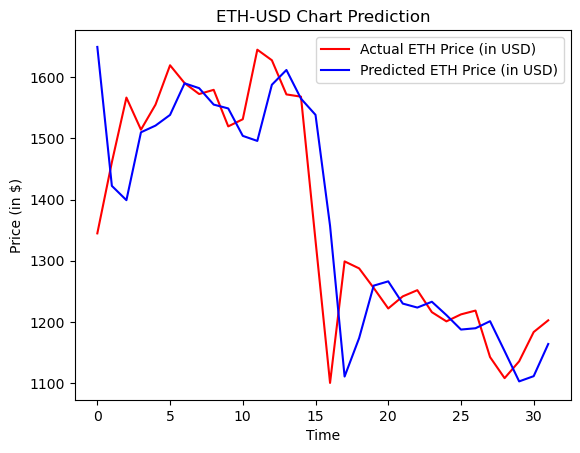

In [35]:
plt.plot(real_crypto_price, color = 'red', label='Actual ETH Price (in USD)')
plt.plot(predicted_crypto_price, color = 'blue', label='Predicted ETH Price (in USD)')
plt.title("ETH-USD Chart Prediction")
plt.xlabel("Time")
plt.ylabel("Price (in $)")
plt.legend()
plt.show()